<a href="https://colab.research.google.com/github/metamatematico/Experimentos-IA/blob/master/Reto_04_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definir las librerias

In [ ]:
from keras.datasets import mnist

from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint 

import numpy as np
import matplotlib.pyplot as plt



#Observar los datos a trabajar

11493376/11490434 [==============================] - 0s 0us/step


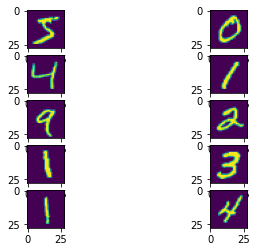

Datos de entrenamiento:  60000
Datos de prueba:  10000


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualizar los datos
fig = plt.figure()
for i in range (0,10):
  a = fig.add_subplot(5,2,i+1)
  plt.imshow(x_train[i])
plt.show()

print('Datos de entrenamiento: ', len(x_train))
print('Datos de prueba: ', len(x_test))


# Reescalar los datos
x_train = x_train.reshape(60000,28,28,1)/255
x_test = x_test.reshape(10000,28,28,1)/255


# Generar el modelo de Autoencoder

In [ ]:
# Parametros
input_size = (28,28,1)
laten_dim= 200

#Encoder
x = Input(input_size)
conv1 = Conv2D(32,3,strides=(2,2),padding='same',activation='relu')(x)
conv2 = Conv2D(64,3,strides=(2,2),padding='same',activation='relu')(conv1)
conv3 = Conv2D(64,3,strides=(2,2),padding='same',activation='relu')(conv2)
f = Flatten()(conv3)
d_e = Dense(200)(f)

#Decoder
x_d = Input(shape=(laten_dim))
d = Dense(3136)(x_d)
r = Reshape((7,7,64))(d)
dec1 = Conv2DTranspose(64,3,strides=(2,2), padding='same', activation='relu')(r)
dec2 = Conv2DTranspose(64,3,strides=(2,2), padding='same', activation='relu')(dec1)
dec3 = Conv2DTranspose(32,3,strides=(1,1), padding='same', activation='relu')(dec2)
dec4 = Conv2DTranspose(1,3,strides=(1,1), padding='same', activation='sigmoid')(dec3)


# Construir los modelos
encoder = Model(inputs = x, outputs= d_e)
decoder = Model(inputs = x_d, outputs = dec4)

conexion = decoder(encoder(x))
AU = Model(inputs = x, outputs= conexion)
AU.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model (Functional)           (None, 200)               260744    
_________________________________________________________________
model_1 (Functional)         (None, 28, 28, 1)         722945    
Total params: 983,689
Trainable params: 983,689
Non-trainable params: 0
_________________________________________________________________


# Entrenar el modelo

In [ ]:
AU.compile(optimizer=Adam(lr = 1e-4), loss= 'binary_crossentropy', metrics=['accuracy'])

batch_s = 32

AU.fit(     
    np.array(x_train[:1000])     # Observar los valores a usar para el entrenamiento
    , np.array(x_train[:1000])
    , batch_size = batch_s
    , epochs = 50
)

Epoch 1/50
32/32 [==============================] - 8s 9ms/step - loss: 0.6878 - accuracy: 0.7810
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.5161 - accuracy: 0.8088
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2935 - accuracy: 0.8106
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2717 - accuracy: 0.8133
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2684 - accuracy: 0.8098
Epoch 6/50
32/32 [==============================] - 0s 6ms/step - loss: 0.2624 - accuracy: 0.8092
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2587 - accuracy: 0.8109
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2530 - accuracy: 0.8107
Epoch 9/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2472 - accuracy: 0.8097
Epoch 10/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2350 - accuracy: 0.8117
Epoch 11/50
32/32 [

# Observar los resultados

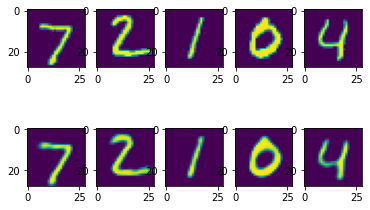

In [ ]:
# Crear la figura
plt.figure(1)

for i in range (0,5):
  # Imagenes reales del dataset
  ax = plt.subplot(2,5,i+1)
  plt.imshow(x_test[i,:,:,0])

  # Imagenes recuperadas por el autoencoder
  ax = plt.subplot(2,5,i+6)
  pred = AU.predict(np.expand_dims(x_test[i],axis=0))
  plt.imshow(pred[0,:,:,0])